В этом ноутбуке мы разберем основы работы с numpy. Это библиотека, позволяющая быстро производить различные вычисления, связанные с матрицами и многомерными массивами. Навык работы с ней является базовым в машинном обучении, т.к. он облегчает работу с данными различной природы, от таблиц до изображений.

Импортируем саму библиотеку

In [1]:
import numpy as np

# Массивы Numpy, базовые операции

Базовой структурой в Numpy является массив numpy, он же numpy.array . Он позволяет хранить многомерные данные, и инициализируется следующим образом:

In [2]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[[2, 3], [3, 4]], [[5, 2], [6, 3]], [[9, 0], [3, 4]]])

In [3]:
A

array([[1, 2],
       [3, 4]])

Такой массив, который мы создали выше, может интерпретироваться как матрица следующего вида:
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}

In [4]:
B

array([[[2, 3],
        [3, 4]],

       [[5, 2],
        [6, 3]],

       [[9, 0],
        [3, 4]]])

При этом, если мы создадим такой массив, который не будет "многомерной таблицей" (т.е. в разных местах у него будут лежать объекты разных размеров), он будет работать некорректно

In [5]:
C = np.array([[2, 3], [1]])

/tmp/ipykernel_5030/2514954225.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  C = np.array([[2, 3], [1]])


In [6]:
C

array([list([2, 3]), list([1])], dtype=object)

Как мы можем увидеть, чтобы все было одного размера, Numpy оборачивает наши данные в объекты list, что не позволяет работать с Numpy массивами нормальным образом

Также можно создать массивы определенного вида - например, единичную матрицу (или обрезанную её версию), или массив чисто из всех нулей

In [7]:
# np.eye - создает единичную матрицу
E = np.eye(3)
E_2 = np.eye(2, 3)
# np.zeros - создает массив из всех нулей
Z = np.zeros((2, 3, 2))

In [8]:
E

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
E_2

array([[1., 0., 0.],
       [0., 1., 0.]])

In [10]:
Z

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

В np.eye передается один аргумент, если матрица квадратная - её размер, и два аргумента с размерами, если она не квадратная. В np.zeros передается один кортеж - размеры выходного массива. Тут мы передали (2, 3, 2) - что это значит? Это значит, что у нас в массиве будет лежать 2 матрицы 3 на 2. Соответственно, если бы там было (4, 2, 3, 2), то у нас была бы табличка с четырьмя строками и двумя столбцами, где каждый элемент - матрица 3 на 2, и т.д.

У numpy массива можно спросить его размер с помощью x.shape

In [11]:
Z.shape

(2, 3, 2)

У массивов, как и у списков в питоне, можно брать элемент по индексу или срезы, но срезы тут более продвинутые - например, их можно писать в одних квадратных скобках. С точки зрения индексации они устроены также, как и обычные питоновские

In [12]:
C = np.array([[2, 3, 4, 5], [3, 4, 5, 6], [6, 7, 8, 9]])
C

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [6, 7, 8, 9]])

In [13]:
C[1] # взять первую строку

array([3, 4, 5, 6])

In [14]:
C[1, 2] #берем элемент, стощий в первой строке и втором столбце (в ноль индексации)

5

In [15]:
C[1:] # берем строки матрицы, начиная с 1ой

array([[3, 4, 5, 6],
       [6, 7, 8, 9]])

In [16]:
C[1:, 1:] # берем строки, начиная с 1ой, и у них берем элементы, начиная с 1ого

array([[4, 5, 6],
       [7, 8, 9]])

Код выше даст тот же результат, что и код ниже

In [17]:
C[1:][:, 1:]

array([[4, 5, 6],
       [7, 8, 9]])

Важное отличие numpy срезов от срезов в обычных списках - им можно что-то присваивать, например:

In [18]:
C[1:, 1:] = np.zeros((2, 3))
C

array([[2, 3, 4, 5],
       [3, 0, 0, 0],
       [6, 0, 0, 0]])

С обычным списком такой трюк не сработает

In [19]:
C_1 = [[2, 3, 4, 5], [1, 2, 3, 4]]
C_1[:1][:1] = [[0, 0, 0], [0, 0, 0]]
C_1

[[2, 3, 4, 5], [1, 2, 3, 4]]

Задача для самопроверки: вам дан Numpy массив размера (3, 3, 3). Сделайте третью матрицу - единичной, и затем переставьте первое измерение массива (т.е. матрицы в массиве) в обратном порядке. Должно получиться так: единичная, вторая матрица, первая матрица.

In [20]:
M = np.array([[[10, 7, 8], [4, 5, 6], [3, 10, 1]],
             [[7, 10, 1], [5, 5, 5], [3, 3, 1]],
              [[10, 8, 8], [4, 5, 6], [3, 10, 1]]])

M[2] = M[0]
M[0] = np.eye(3)
# ...

M

array([[[ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  1]],

       [[ 7, 10,  1],
        [ 5,  5,  5],
        [ 3,  3,  1]],

       [[10,  7,  8],
        [ 4,  5,  6],
        [ 3, 10,  1]]])

Долно получиться нечто такое: <br>
```
        [ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  1],

        [ 7, 10,  1],
        [ 5,  5,  5],
        [ 3,  3,  1],

        [10,  7,  8],
        [ 4,  5,  6],
        [ 3, 10,  1]
```

Массивы также можно склеивать между собой, с помощью np.concatenate(кортеж матриц, axis=измерение сквозь которое склеивать). Примеры:

In [21]:
A = np.array([[1, 2, 3]])
B = np.array([[3, 4, 5]])
C = np.array([[6, 7, 8]])
D = np.concatenate((A, B, C), axis=0)
E = np.concatenate((A, B, C), axis=1)
D

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 8]])

In [22]:
E

array([[1, 2, 3, 3, 4, 5, 6, 7, 8]])

Тут у нас есть три массива, размера (1, 3). Если мы объединяем по нулевому измерению, то оно как бы увеличивается и туда добавляются новые элементы, т.е. мы получаем массив (3, 3), как видно. Если же склеивать по второму измерению, то новые элементы добавляются туда, а остальные остаются неизменными, что и происходит с помощью такой упаковки векторов.

Склеивать можно также и многомерные массивы

In [23]:
M_1, M_2, M_3 = M
np.concatenate((M_1, M_2, M_3), axis=1) # переупаковали массив M, которая была 
# в задании выше, взяв все матрицы оттуда и объединив их по строкам (по строкам, т.к.
# в нашем случае это и будет измерение с индексом 1

array([[ 1,  0,  0,  7, 10,  1, 10,  7,  8],
       [ 0,  1,  0,  5,  5,  5,  4,  5,  6],
       [ 0,  0,  1,  3,  3,  1,  3, 10,  1]])

# Связь с алгеброй, арифметические операции

Если numpy массивы одного размера, то их можно складывать. Тогда они будут складываться поэлементно (см. примеры). Также можно прибавить к numpy массиву число, тогда оно будет прибавлено ко всем элементам массива

In [24]:
A = np.array([[1, 2], [3, 4]]) 
B = np.array([[3, 4], [1, 2]])
A + B # т.е. элемент A[0, 0] сложится с элементом B[0, 0], A[1, 0] с B[1, 0] и т.д.

array([[4, 6],
       [4, 6]])

In [25]:
A + 1

array([[2, 3],
       [4, 5]])

Либо же матрицу можно умножать на число - тогда умножатся все элементы

In [26]:
2 * A

array([[2, 4],
       [6, 8]])

Их также можно умножать, но умножения существует два - поточечное и матричное.

In [27]:
#поточечное умножение
A * B # также, как с суммой, элемент A[0, 0] умножится на элемент B[0, 0], A[1, 0] на B[1, 0] и т.д.

array([[3, 8],
       [3, 8]])

In [28]:
# матричное умножение
A @ B # тогда у нас на позиции [0, 0] стоит поточечное произведение A[0] и B[:, 0]
# нулевой строки матрицы A на нулевой столбец матрицы B, т.е. A[0] @ B[:, 0]

array([[ 5,  8],
       [13, 20]])

Если мы попробуем с помощью @ умножить массивы больших размеров, то оно будет спускаться, пока не дойдет до матриц, и уже их начнет матрично умножать (это почти нигде не используется, но все же)

In [29]:
C = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
D = np.array([[[-1, 1], [0, 1]], [[2, -1], [1, -1]]])
C @ D # можете проверить, что тут так и происходит

array([[[ -1,   3],
        [ -3,   7]],

       [[ 16, -11],
        [ 22, -15]]])

In [30]:
C[0] @ D[0]

array([[-1,  3],
       [-3,  7]])

Матрицы, записанные с помощью numpy массивов, можно также транспонировать - это когда мы строки и столбцы меняем местами:

Было:

In [31]:
C[0]

array([[1, 2],
       [3, 4]])

Стало:

In [32]:
C[0].T # как мы видим, оно работает также, как и в линейно-алгебраическом случае

array([[1, 3],
       [2, 4]])

Также в numpy есть полезный модуль - numpy.linalg. Он позволяет реализовывать с матрицами различные операции из линейной алгебры, например нахождение обратной матрицы с помощью np.linalg.inv, если она существует

In [33]:
A = np.array([[2, 3], [4, 5]])
B = np.linalg.inv(A)
B

array([[-2.5,  1.5],
       [ 2. , -1. ]])

In [34]:
A @ B # как мы видим, все работает

array([[1., 0.],
       [0., 1.]])

Или, если у нас есть система линейных уравнений, записанная в матричном виде (т.е. матрица коэффициентов и столбец значений справа), мы можем её решить с помощью np.linalg.solve. Например, вот такая система:
\begin{equation}
\begin{cases}
2x + 3y = 8 \\
x + y = 3
\end{cases}
\end{equation}
с помощью numpy решается вот так:

In [35]:
A = np.array([[2, 3], [1, 1]])
b = np.array([8, 3])
np.linalg.solve(A, b)

array([1., 2.])

Либо можно решить эту систему с помощью обратной матрицы, как мы видели на прошлой лекции, т.е. сделать из Ax=b выражение 
\begin{equation}
x = A^{-1}b
\end{equation}

In [36]:
np.linalg.inv(A) @ b # и все реально получилось

array([1., 2.])

Но например если у системы не единственное решение (как и в случае с np.linalg.inv, если матрица не обратима), будет ошибка:

In [37]:
A = np.array([[2, 2], [1, 1]])
b = np.array([6, 3])
np.linalg.solve(A, b)

LinAlgError: Singular matrix

Давайте, для примера как это все вместе работает, посчитаем следующее выражение, где X - матрица размера (n, m), y - матрица размера (n), т.е. столбец: 
\begin{equation}
(X^{T}*X)^{-1}*(X^T*y)
\end{equation}

In [ ]:
def solve_something(X, y):
  squared_x = X.T @ X #считаем произведение транспонированной X на X
  inversed_squared_x = np.linalg.inv(squared_x) #ищем матрицу, обратную к squared_x
  coefs = inversed_squared_x @ (X.T @ y) #считаем результат
  return coefs

Проверим, что все работает и нигде нет ошибок

In [38]:
X = np.array([[1, 1], [1, 2], [2, 1], [2, 2], [3, 1]])
y = X[:, 0] + 3 * X[:, 1]
coefs = solve_something(X, y)
coefs # как мы видим, все отработало

NameError: name 'solve_something' is not defined

Если пересмотреть прошлую лекцию, то мы увидим, что функция solve_something позволяет находить линейные зависимости между столбцами X и y (например, если тут трактовать X как координаты точек на столе, y - температуру, то температура получается из первой координаты + 3 * вторая координата)

# Немного не про массивы

Помимо работы с массивами, в Numpy есть также множество инструментов для работы с математикой, например:

In [39]:
np.pi, np.e # есть математические константы

(3.141592653589793, 2.718281828459045)

In [40]:
np.sin(np.pi/6), np.cos(np.pi/6) # есть тригонометрические функции

(0.49999999999999994, 0.8660254037844387)

Более того, мы можем применять все эти функции, как и любые другие, к нашим Numpy массивам - тогда они просто будут применяться поэлементно

In [41]:
X = np.array([[1/6, 1/4, 1/3, 1/2], [2/3, 3/4, 5/6, 1]]) * np.pi
for x in np.sin(X):
  for y in x:
    print(f"{y:.3f}", end=" ")
  print()

0.500 0.707 0.866 1.000 
0.866 0.707 0.500 0.000 


В numpy также есть функции, позволяющие считать что-то по всему массиву, например сумму или среднее:

In [42]:
A = np.array([[1, 2], [3, 4]])
A.sum(), np.sum(A), A.mean(), np.mean(A)

(10, 10, 2.5, 2.5)

In [43]:
A

array([[1, 2],
       [3, 4]])

Мы можем также посчитать среднее или сумму по столбцам/строкам/любому измерению, как бы схлопнув их в одно число, с помощью параметра axis

In [44]:
A.sum(axis=1) #первое измерение это строки, поэтому мы пробегаемся по всем строкам
# и берем сумму по тому, как пробежались

array([3, 7])

In [45]:
A.sum(axis=0) # нулевое измерение - столбцы, тогда мы пробегаемся по ним и считаем сумму
# уже внутри строк

array([4, 6])

С помощью Numpy можно также создать массив, содержащий точки из отрезка, равноудаленные друг от друга, или в определенном количестве, с помощью np.linspace - это может быть полезно при построении различных графиков, или переборе чего-то по сетке

In [46]:
X = np.linspace(0, 1, 5) # сначала идут границы отрезка, потом количество точек
X

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Например, мы хотим точечно посчитать функцию sin(x) и построить её график. Тогда вот что нам нужно написать:

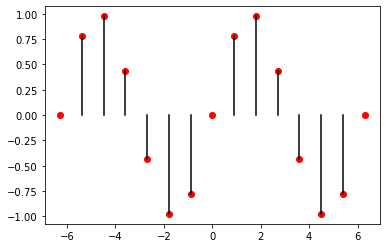

In [47]:
import matplotlib.pyplot as plt
X = np.linspace(-2 * np.pi, 2 * np.pi, 15) #пусть мы живем от -2 пи до 2 пи, и у нас 15 точек
Y = np.sin(X) # применим нашу функцию ко всем точкам в X
plt.scatter(X, Y, marker="o", color="r") #не думайте что тут, вас ещё научат, но фактически просто строится график по точкам
for x, y in zip(X, Y):
  plt.plot([x, x], [0, y], color="black") #добавим немного красоты
plt.show()

То же самое можно сделать с помощью np.arange, но там задается шаг, с которым мы берем точки отрезка, и он не включает конечную точку в результат

In [48]:
np.arange(0, 1, 0.25)

array([0.  , 0.25, 0.5 , 0.75])

Есть также модуль np.random, в котором есть множество функций, связанных со случайностью. В частности, можно сгенерировать случайный массив любого размера со значениями в диапазоне [0, 1]

In [49]:
random_massive = np.random.random((2, 3, 3)) # первым аргументом, как и в np.zeros, идет кортеж размерностей
random_massive

array([[[0.4732734 , 0.73907048, 0.87106572],
        [0.21102941, 0.8206971 , 0.67272858],
        [0.58323473, 0.15732432, 0.71991596]],

       [[0.40894155, 0.91297218, 0.69992414],
        [0.28760065, 0.80008959, 0.36820615],
        [0.94417045, 0.15039508, 0.27756102]]])

In [50]:
random_massive.shape

(2, 3, 3)

И давайте ещё немного попрактикуемся. Что такое изображение? Фактически, у нас каждый пиксель хранит три числа - так как мы живем обычно в RGB. Тогда мы можем представить его в виде numpy массива размера (n, m, 3), где n и m - высота и ширина изобажения! Давайте откроем какое-нибудь изображение и немного с ним пошаманим

In [51]:
# скачаем изображение
!wget https://i.ucrazy.ru/files/pics/2015.09/1442997432_5.jpg

--2022-07-21 17:02:44--  https://i.ucrazy.ru/files/pics/2015.09/1442997432_5.jpg
Распознаётся i.ucrazy.ru (i.ucrazy.ru)… 2606:4700:3032::ac43:9e95, 2606:4700:3036::6815:2128, 172.67.158.149, ...
Подключение к i.ucrazy.ru (i.ucrazy.ru)|2606:4700:3032::ac43:9e95|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 278025 (272K) [image/jpeg]
Сохранение в: «1442997432_5.jpg.2»

1442997432_5.jpg.2  100%[===================>] 271,51K   440KB/s    за 0,6s    

2022-07-21 17:02:45 (440 KB/s) - «1442997432_5.jpg.2» сохранён [278025/278025]



In [52]:
import cv2 as cv
img = cv.imread("1442997432_5.jpg")
plt.imshow(img, );

ModuleNotFoundError: No module named 'cv2'

Изначально openCV открывает изображение будто оно b, g, r, а не rgb, и кладет его в numpy массив. Давайте это исправим, а именно повернем числа на последней оси. Тогда у нас bgr превратится в rgb

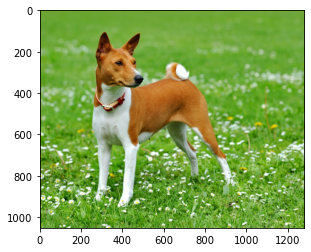

In [63]:
img = img[:, :, ::-1]
plt.imshow(img);

Теперь цвета отображаются верно. Давайте, например, оставим в этом изображении только красный цвет

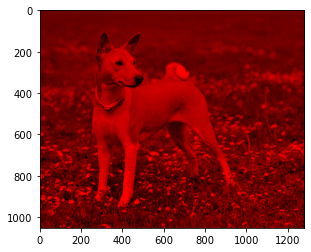

In [64]:
red_img = img.copy()
red_img[:, :, 1:] = 0 # по последней оси, где лежат цвета пикселей, все кроме красного
# делаем нулями
plt.imshow(red_img);

Или переведем изображение в негатив

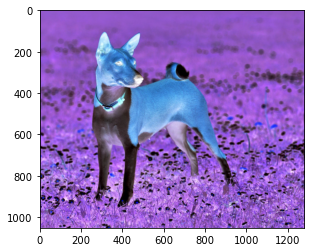

In [65]:
neg_img = img.copy()
neg_img = 255 - neg_img
plt.imshow(neg_img)

In [66]:
Stegosaurus = np.array([2, 12, 3, 6, 5])
Tyrannosaur = np.array([5, 23, 4, 18, 15])
Diplodocus = np.array([7, 20, 10, 13, 12])

In [67]:
def weight(a,b,c):
    return np.sum(a+b+c)

In [68]:
weight(Stegosaurus,Tyrannosaur,Diplodocus)

155